In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import warnings
warnings.simplefilter("ignore", UserWarning)

In [141]:
df = pd.read_csv('daily-total-female-births-CA.csv')

In [142]:
df.isnull().sum()

date      0
births    0
dtype: int64

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    365 non-null    object
 1   births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [144]:
df

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [145]:
df['date']=pd.to_datetime(df['date'])

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   births  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [147]:
#Changing the index
df.set_index('date',inplace=True)

In [148]:
df

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


<AxesSubplot:xlabel='date'>

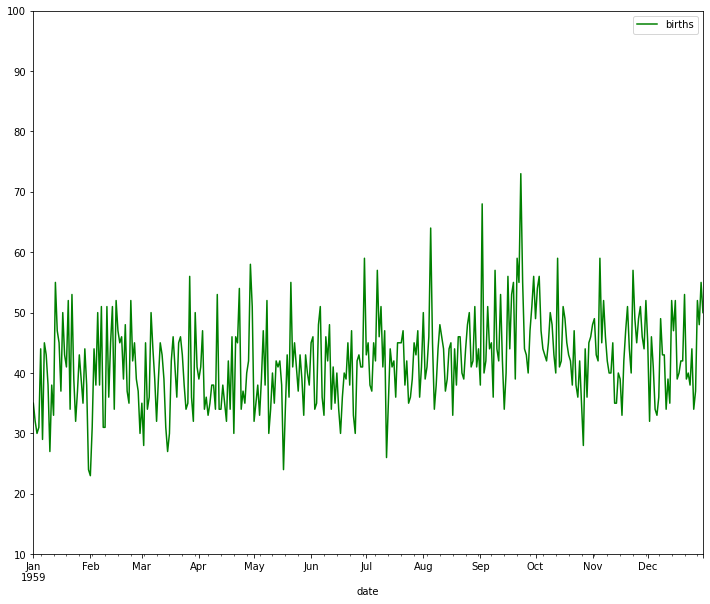

In [149]:
df.plot(ylim=[10,100],figsize=(12,10),c='green')

In [150]:
df['10 days rolling'] = df['births'].rolling(window=10).mean()
df['20 days rolling'] = df['births'].rolling(window=20).mean()

df['30 days rolling'] = df['births'].rolling(window=30).mean()

In [151]:
df.head(11)

,births,10 days rolling,20 days rolling,30 days rolling
date,,,,
1959-01-01,35,NaN,NaN,NaN
1959-01-02,32,NaN,NaN,NaN
1959-01-03,30,NaN,NaN,NaN
1959-01-04,31,NaN,NaN,NaN
1959-01-05,44,NaN,NaN,NaN
1959-01-06,29,NaN,NaN,NaN
1959-01-07,45,NaN,NaN,NaN
1959-01-08,43,NaN,NaN,NaN
1959-01-09,38,NaN,NaN,NaN


<AxesSubplot:xlabel='date'>

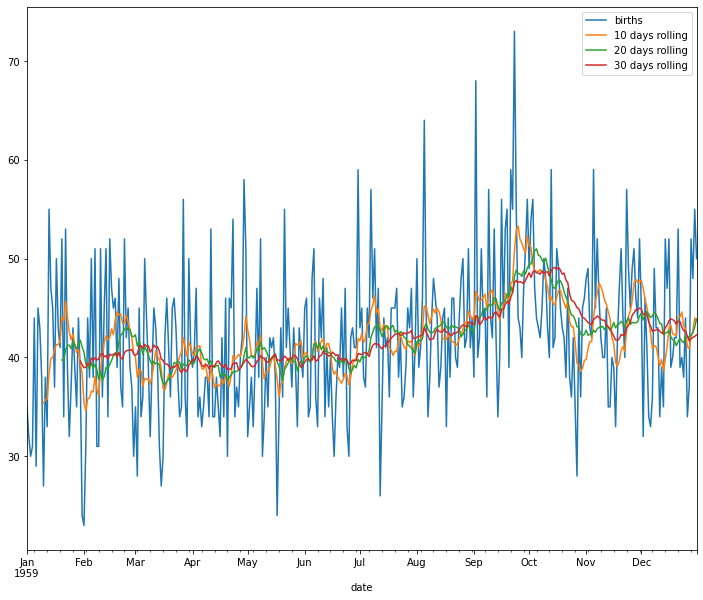

In [152]:
df[['births','10 days rolling','20 days rolling','30 days rolling']].plot(figsize=(12,10))

<AxesSubplot:xlabel='date'>

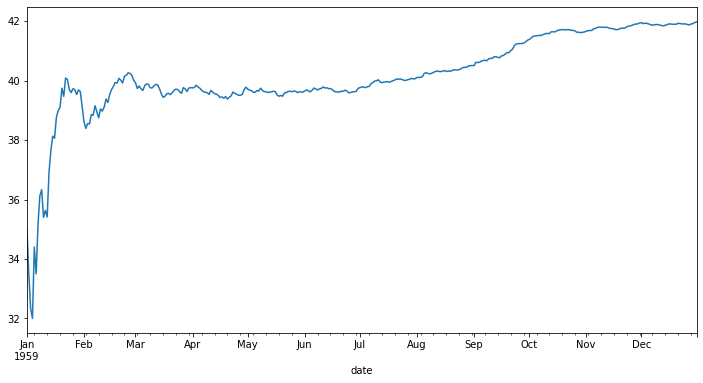

In [153]:
#Exponential moving average
df['births'].expanding().mean().plot(figsize=(12,6))

In [154]:
df['ewa0.3']= df['births'].ewm(alpha=0.3,adjust=False).mean()

In [155]:
df

,births,10 days rolling,20 days rolling,30 days rolling,ewa0.3
date,,,,,
1959-01-01,35,NaN,NaN,NaN,35.000000
1959-01-02,32,NaN,NaN,NaN,34.100000
1959-01-03,30,NaN,NaN,NaN,32.870000
1959-01-04,31,NaN,NaN,NaN,32.309000
1959-01-05,44,NaN,NaN,NaN,35.816300
...,...,...,...,...,...
1959-12-27,37,40.9,42.10,41.700000,38.828280
1959-12-28,52,42.1,42.25,41.900000,42.779796
1959-12-29,48,42.7,42.50,42.033333,44.345857


<AxesSubplot:xlabel='date'>

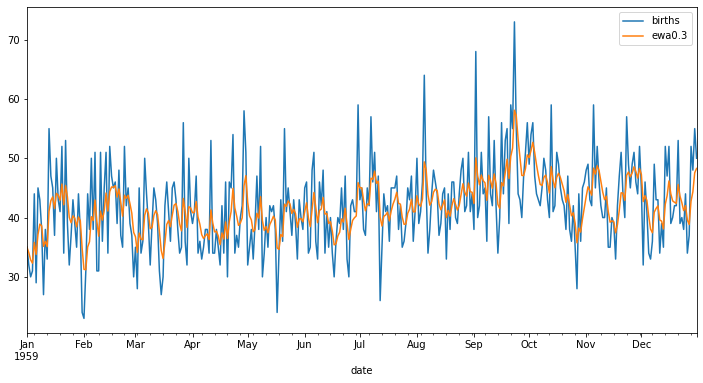

In [156]:
df[['births','ewa0.3']].plot(figsize=(12,6))